In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

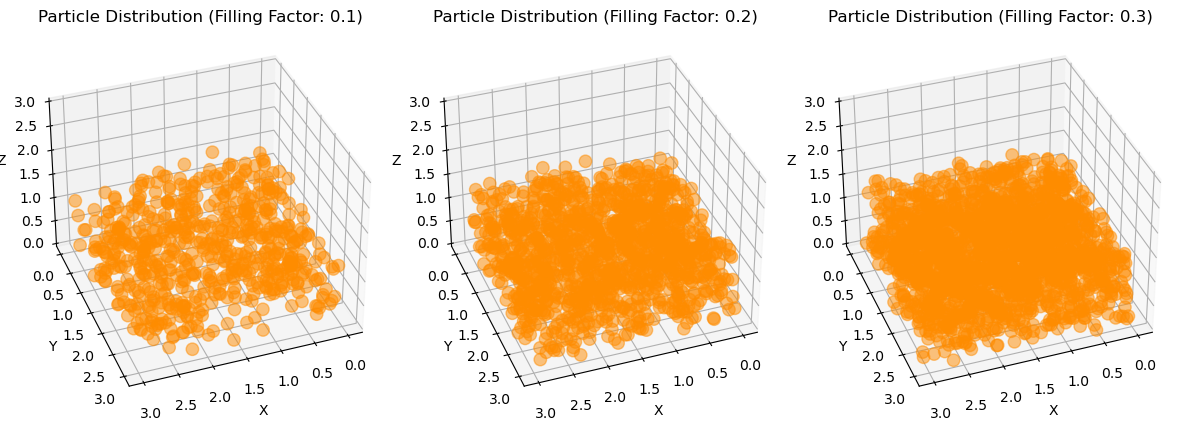

In [53]:
# Define the slab properties
slab_width = 3
slab_height = 3
slab_depth = 1.5

# Define the particle properties
particle_radius = 0.08

# Define the range of filling factors
filling_factors = [0.1, 0.2, 0.3]

# Number of rays for the simulation
num_rays = 100000

def generate_particles(slab_dimensions, filling_factor):
    volume_slab = slab_dimensions[0] * slab_dimensions[1] * slab_dimensions[2]
    volume_particle = (4/3) * np.pi * particle_radius**3
    num_particles = int(filling_factor * volume_slab / volume_particle)
    
    particles = np.random.uniform(0, slab_dimensions, (num_particles, 3))
    return particles

def monte_carlo_ray_tracing(slab_dimensions, particles, num_rays):
    reflectance = 0
    for _ in tqdm(range(num_rays), desc="Simulating rays"):
        # Generate a ray entering the slab
        ray_origin = np.random.uniform(0, slab_dimensions[0]), np.random.uniform(0, slab_dimensions[1]), 0
        ray_direction = np.array([0, 0, 1])
        
        while ray_origin[2] < slab_dimensions[2]:
            distances = np.linalg.norm(particles - ray_origin, axis=1)
            if np.any(distances <= particle_radius):
                reflectance += 1
                break
            ray_origin = ray_origin + ray_direction * 1
        
    return reflectance / num_rays

# 3D plot function to visualize particle distribution
def plot_particle_distribution(ax, particles, filling_factor):
    ax.scatter(particles[:, 0], particles[:, 1], particles[:, 2], c='darkorange', marker='o', s= 80, alpha=0.5)
    ax.set_zlim(0, 3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Particle Distribution (Filling Factor: {filling_factor})')
    ax.view_init(elev=35,azim=70)

# Simulate for different filling factors
fig = plt.figure(figsize=(12, 9))

for i, filling_factor in enumerate(filling_factors):
    # Generate particles
    particles = generate_particles((slab_width, slab_height, slab_depth), filling_factor)
    
    # Plot particle distribution
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    plot_particle_distribution(ax, particles, filling_factor)

plt.tight_layout()
plt.show()


### Fig 2

100%|██████████| 181/181 [00:15<00:00, 11.55it/s]


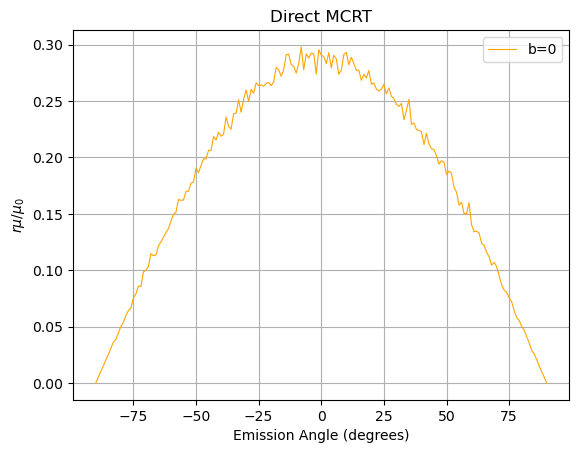

In [63]:
#Initial Trial

def heney_greenstein_phase_function(g, b):
    # Henyey-Greenstein phase function.
    return (1 - b**2) / (4 * np.pi * (1 + b**2 + 2 * b * np.cos(g))**(3/2))

def direct_mcrt(n_photons, radius, ssa, incidence_angle, b):
    r_mu_over_mu_0 = []
    mu_0 = np.cos(np.radians(incidence_angle))
    
    for emission_angle in tqdm(range(-90, 91, 1)):  # Emission angle range from -90 to 90 degrees
        photons_scattered = 0
        mu = np.cos(np.radians(emission_angle))
        
        
        for _ in range(n_photons):
            x, y, z = 0, 0, 0  # Starting at the origin
            
            while True:
                # Absorption Probability
                p_A = 1 - ssa
                v1 = np.random.rand()
                if v1 > p_A:
                    break  # Photon absorbed
               
                # To determine the scattering angle
                g_guess = np.random.uniform(0, np.pi)  # Guess for scattering angle
                 
                # Initialize p_g_guess before the inner loop
                p_g_guess = heney_greenstein_phase_function(g_guess, b)
                
                while True:
                    dP_dg = p_g_guess * 2 * np.pi * np.sin(g_guess)  # Probability density function for scattering at angle g_guess
                    
                    v2 = np.random.rand() * dP_dg.max()  # Random variable uniformly distributed between 0 and max_dP_dg
                    if dP_dg > v2:
                        g = g_guess  # Accept g_guess as scattering angle
                        break
                
                # Calculate phase function using Henyey-Greenstein function
                p_g_guess = heney_greenstein_phase_function(g, b)
                
                # Azimuthal Angle Determination
                psi = 2 * np.pi * np.random.rand()  # Azimuthal angle uniformly distributed between 0 and 2pi
                
                # Recording Escaped Photons
                photons_scattered += 1  # Increase count of scattered photons
                
                # Apply periodic boundary conditions
                # (Not included in this code to reduce time)
                    
                # Escape condition
                # (Not included in this code  to reduce time)
                    
        reflectance = photons_scattered / n_photons
        r_mu_over_mu_0.append(reflectance * mu / mu_0)
    
    return r_mu_over_mu_0

# Simulation parameters
n_photons = 10**4  # Reduced number of photons for faster computation
radius = 1.0  # Arbitrary unit
ssa = 0.8
incidence_angle = 30  # Incidence angle in degrees
b = 0  # Asymmetry factor

# Run direct MCRT simulation
r_mu_over_mu_0 = direct_mcrt(n_photons, radius, ssa, incidence_angle, b)

# Plot results
emission_angles = np.arange(-90, 91, 1)
fig = plt.figure()
plt.plot(emission_angles, r_mu_over_mu_0, c='orange', linewidth=0.8, label= 'b=0')
plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
leg = plt.legend()
plt.title('Direct MCRT')
plt.grid(True)
plt.show()


100%|██████████| 181/181 [05:09<00:00,  1.71s/it]


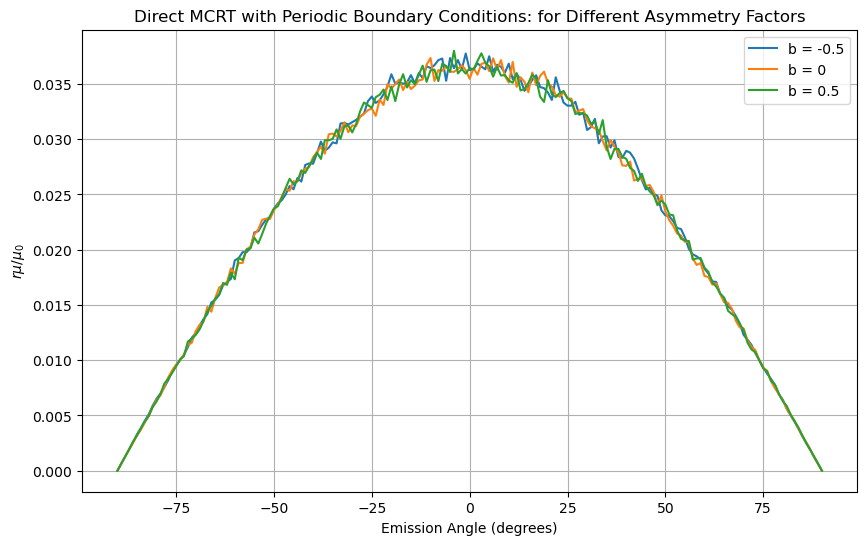

In [4]:
#TRIAL PHASE

def heney_greenstein_phase_function(g, b):
    """Henyey-Greenstein phase function."""
    return (1 - b**2) / (4 * np.pi * (1 + b**2 + 2 * b * np.cos(g))**(3/2))

def direct_mcrt(n_photons, radius, ssa, incidence_angle, b):
    r_mu_over_mu_0 = []
    mu_0 = np.cos(np.radians(incidence_angle))
    
    for emission_angle in tqdm(range(-90, 91, 1)):  # Emission angle range from -90 to 90 degrees
        photons_scattered = 0
        mu = np.cos(np.radians(emission_angle))
        
        for _ in range(n_photons):
            x, y, z = 0, 0, 0  # Starting at the origin
            
            while True:
                # Absorption Probability
                p_A = 1 - ssa
                v1 = np.random.rand()
                if v1 > p_A:
                    break  # Photon absorbed
               
                # To determine the scattering angle
                g_guess = np.random.uniform(0, np.pi)  # Guess for scattering angle
                 
                # Initialize p_g_guess before the inner loop
                p_g_guess = heney_greenstein_phase_function(g_guess, b)
                
                while True:
                    dP_dg = p_g_guess * 2 * np.pi * np.sin(g_guess)  # Probability density function for scattering at angle g_guess
                    
                    v2 = np.random.rand() * dP_dg.max()  # Random variable uniformly distributed between 0 and max_dP_dg
                    if dP_dg > v2:
                        g = g_guess  # Accept g_guess as scattering angle
                        break
                
                # Calculate phase function using Henyey-Greenstein function
                p_g_guess = heney_greenstein_phase_function(g, b)
                
                # Azimuthal Angle Determination
                psi = 2 * np.pi * np.random.rand()  # Azimuthal angle uniformly distributed between 0 and 2pi
                
                # Update photon position
                x += np.sin(g) * np.cos(psi)
                y += np.sin(g) * np.sin(psi)
                z += np.cos(g)
                
                # Apply periodic boundary conditions
                x = x % (2 * radius)
                y = y % (2 * radius)
                z = z % (2 * radius)
                
                # Escape condition
                if x < 0 or x > radius or y < 0 or y > radius or z < 0 or z > radius:
                    break  # Photon escaped
                
                # Increase count of scattered photons
                photons_scattered += 1
                    
        reflectance = photons_scattered / n_photons
        r_mu_over_mu_0.append(reflectance * mu / mu_0)
    
    return r_mu_over_mu_0

# Simulation parameters
n_photons = 10**5  # Reduced number of photons for faster computation
radius = 1.0  # Arbitrary unit
ssa = 0.75
incidence_angle = 30  # Incidence angle in degrees
bs = [-0.5, 0, 0.5]  # Asymmetry factors

# Plot results for each asymmetry factor
plt.figure(figsize=(10, 6))
for b in bs:
    # Run direct MCRT simulation
    r_mu_over_mu_0 = direct_mcrt(n_photons, radius, ssa, incidence_angle, b)

    # Plot results
    emission_angles = np.arange(-90, 91, 1)
    plt.plot(emission_angles, r_mu_over_mu_0, label=f'b = {b}')

plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
plt.title('Direct MCRT with Periodic Boundary Conditions: for Different Asymmetry Factors')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
def heney_greenstein_phase_function(g, b):
    """Henyey-Greenstein phase function."""
    return (1 - b**2) / (4 * np.pi * (1 + b**2 + 2 * b * np.cos(g))**(3/2))

def direct_mcrt(n_photons, radius, ssa, incidence_angle, b):
    r_mu_over_mu_0 = []
    mu_0 = np.cos(np.radians(incidence_angle))
    
    for emission_angle in tqdm(range(-90, 91, 1)):  # Emission angle range from -90 to 90 degrees
        photons_scattered = 0
        mu = np.cos(np.radians(emission_angle))
        
        for _ in range(n_photons):
            x, y, z = 0, 0, 0  # Starting at the origin
            
            while True:
                # Absorption Probability
                p_A = 1 - ssa
                v1 = np.random.rand()
                if v1 > p_A:
                    break  # Photon absorbed
               
                # To determine the scattering angle
                g_guess = np.random.uniform(0, np.pi)  # Guess for scattering angle
                 
                # Initialize p_g_guess before the inner loop
                p_g_guess = heney_greenstein_phase_function(g_guess, b)
                
                while True:
                    dP_dg = p_g_guess * 2 * np.pi * np.sin(g_guess)  # Probability density function for scattering at angle g_guess
                    
                    v2 = np.random.rand() * dP_dg.max()  # Random variable uniformly distributed between 0 and max_dP_dg
                    if dP_dg > v2:
                        g = g_guess  # Accept g_guess as scattering angle
                        break
                
                # Calculate phase function using Henyey-Greenstein function
                p_g_guess = heney_greenstein_phase_function(g, b)
                
                # Azimuthal Angle Determination
                psi = 2 * np.pi * np.random.rand()  # Azimuthal angle uniformly distributed between 0 and 2pi
                
                # Update photon position
                x += np.sin(g) * np.cos(psi)
                y += np.sin(g) * np.sin(psi)
                z += np.cos(g)
                
                # Apply periodic boundary conditions
                x = x % (2 * radius)
                y = y % (2 * radius)
                z = z % (2 * radius)
                
                # Escape condition
                if x < 0 or x > radius or y < 0 or y > radius or z < 0 or z > radius:
                    break  # Photon escaped
                
                # Increase count of scattered photons
                photons_scattered += 1
                    
        reflectance = photons_scattered / n_photons
        r_mu_over_mu_0.append(reflectance * mu / mu_0)
    
    return r_mu_over_mu_0

# Simulation parameters
n_photons = 10**7  # Very long computation time # Do not run unless needed
radius = 1.0  # Arbitrary unit
ssa = 0.7
incidence_angle = 30  # Incidence angle in degrees
b = 0.2  # Asymmetry factor

'''
# Run direct MCRT simulation
r_mu_over_mu_0 = direct_mcrt(n_photons, radius, ssa, incidence_angle, b)

# Plot results
emission_angles = np.arange(-90, 91, 1)
plt.plot(emission_angles, r_mu_over_mu_0,c='orange', linewidth=0.8, label = '0.2')
plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
plt.title(r'Direct MCRT with Periodic Boundary Conditions')
plt.grid(True)
plt.show()
'''


'''
Output: 100%|██████████| 181/181 [6:07:35<00:00, 121.85s/it]  
'''

100%|██████████| 181/181 [6:07:35<00:00, 121.85s/it]  


100%|██████████| 181/181 [02:27<00:00,  1.22it/s]


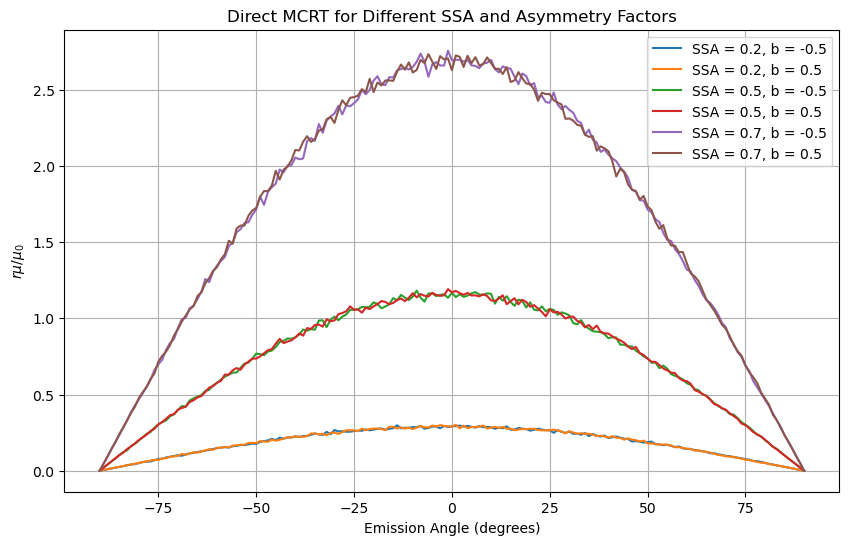

In [3]:
#DIRECT MCRT

def heney_greenstein_phase_function(g, b):
    """Henyey-Greenstein phase function."""
    return (1 - b**2) / (4 * np.pi * (1 + b**2 + 2 * b * np.cos(g))**(3/2))

def compute_slab_depth(filling_factor, radius):
    cross_sectional_area = np.pi * radius**2
    mean_free_path = 1 / (filling_factor * cross_sectional_area)
    # Set the slab depth to be several times the mean free path
    slab_depth = (10**6) * mean_free_path
    return slab_depth

def direct_mcrt(n_photons, radius, ssa, incidence_angle, b, f):
    slab_depth = compute_slab_depth(f, radius)
    r_mu_over_mu_0 = []
    mu_0 = np.cos(np.radians(incidence_angle))
    
    for emission_angle in tqdm(range(-90, 91, 1)):  # Emission angle range from -90 to 90 degrees
        photons_scattered = 0
        mu = np.cos(np.radians(emission_angle))
        
        for _ in range(n_photons):
            x, y, z = 0, 0, 0  # Starting at the origin
            
            # Initial photon direction based on incidence angle
            direction = np.array([np.sin(np.radians(incidence_angle)), 0, np.cos(np.radians(incidence_angle))])
            
            while True:
                # Absorption Probability
                v1 =  np.random.rand()
                if v1 > ssa:
                    break  # Photon absorbed
                 
                # To determine the scattering angle
                while True:
                    g_guess = np.random.uniform(0, np.pi)  # Guess for scattering angle
                    p_g_guess = heney_greenstein_phase_function(g_guess, b)
                    dP_dg = p_g_guess * 2 * np.pi * np.sin(g_guess)  # Probability density function for scattering at angle g_guess
                    
                    v2 = np.random.rand() * dP_dg.max()  # Random variable uniformly distributed between 0 and max_dP_dg
                    if dP_dg > v2:
                        g = g_guess  # Accept g_guess as scattering angle
                        break
                
                # Azimuthal Angle Determination
                psi = 2 * np.pi * np.random.rand()  # Azimuthal angle uniformly distributed between 0 and 2pi
                
                # Update photon direction using scattering angles
                direction[0] = np.sin(g) * np.cos(psi)
                direction[1] = np.sin(g) * np.sin(psi)
                direction[2] = np.cos(g)
                
                # Update photon position
                x += direction[0]
                y += direction[1]
                z += direction[2]
                
                # Apply periodic boundary conditions
                x = x % (2 * radius)
                y = y % (2 * radius)
                z = z % (2 * radius)
                
                # Escape condition: ensure photons do not exceed slab depth
                if z > slab_depth:
                    break  # Photon escaped
                
                # Increase count of scattered photons
                photons_scattered += 1
                    
        reflectance = photons_scattered / n_photons
        r_mu_over_mu_0.append(reflectance * mu / mu_0)
    
    return r_mu_over_mu_0

# Simulation parameters
n_photons = 10**4  # Reduced number of photons for faster computation
radius = 0.01  # Arbitrary unit
ssas = [0.2, 0.5, 0.7]  # Assumed single scattering albedos
incidence_angle = 30  # Incidence angle in degrees
bs = [-0.5,0.5]  # Asymmetry factors
f = 0.2  # Filling factor

# Plot results for each asymmetry factor and SSA
plt.figure(figsize=(10, 6))
for ssa in ssas:
    for b in bs:
        # Run direct MCRT simulation
        r_mu_over_mu_0 = direct_mcrt(n_photons, radius, ssa, incidence_angle, b, f)

        # Plot results
        emission_angles = np.arange(-90, 91, 1)
        plt.plot(emission_angles, r_mu_over_mu_0, label=f'SSA = {ssa}, b = {b}')

plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
plt.title('Direct MCRT for Different SSA and Asymmetry Factors')
plt.grid(True)
plt.legend()
plt.show()


100%|██████████| 181/181 [03:12<00:00,  1.07s/it]


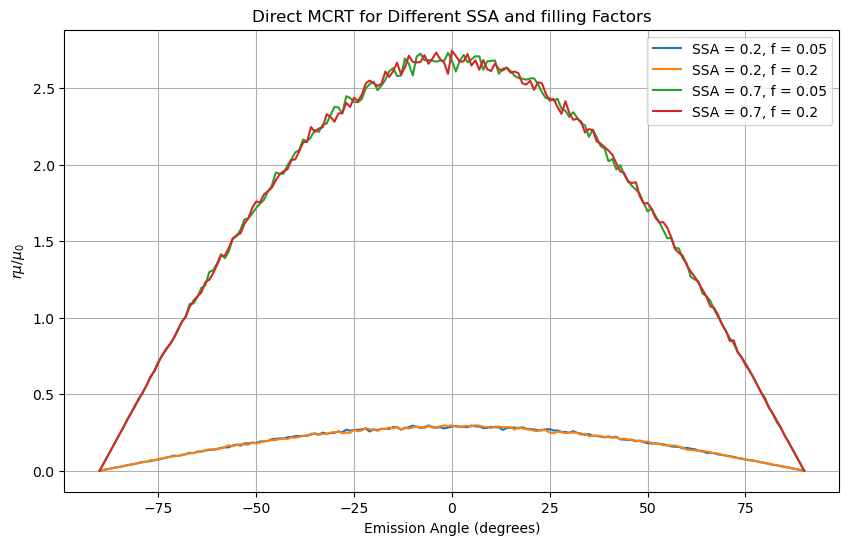

In [7]:
#CHECK FOR SSA AND FILLING FACTOR

# Simulation parameters
n_photons = 10**4  # Reduced number of photons for faster computation
radius = 0.01  # Arbitrary unit
ssas = [0.2,0.7]  # Assumed single scattering albedos
incidence_angle = 30  # Incidence angle in degrees
b = 0  # Asymmetry factors
fs = [0.05,0.2]  # Filling factor

# Plot results for each asymmetry factor and SSA
plt.figure(figsize=(10, 6))
for ssa in ssas:
    for f in fs:
        # Run direct MCRT simulation
        r_mu_over_mu_0 = direct_mcrt(n_photons, radius, ssa, incidence_angle, b, f)

        # Plot results
        emission_angles = np.arange(-90, 91, 1)
        plt.plot(emission_angles, r_mu_over_mu_0, label=f'SSA = {ssa}, f = {f}')

plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
plt.title('Direct MCRT for Different SSA and filling Factors')
plt.grid(True)
plt.legend()
plt.show()


100%|██████████| 181/181 [06:01<00:00,  2.00s/it]


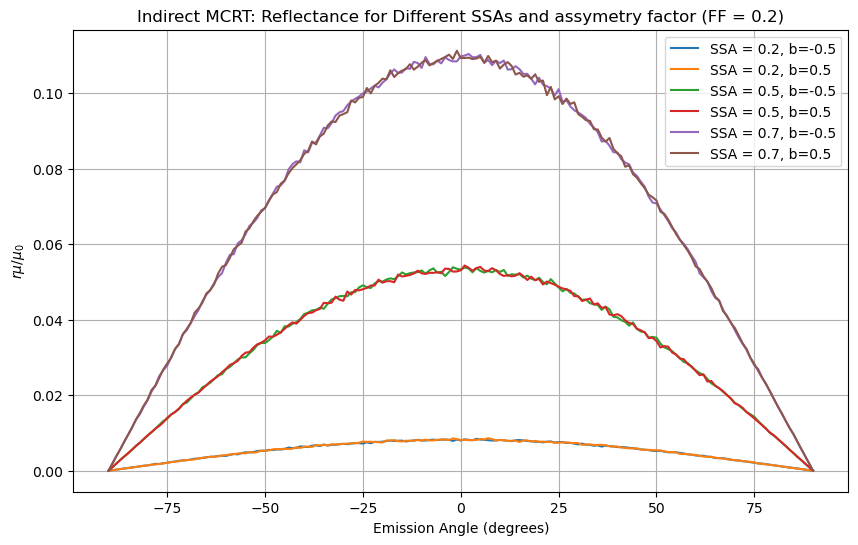

In [16]:
#INDIRECT MCRT

def heney_greenstein_phase_function(g, b):
    """Henyey-Greenstein phase function."""
    return (1 - b**2) / (4 * np.pi * (1 + b**2 + 2 * b * np.cos(g))**(3/2))

def compute_slab_depth(filling_factor, radius):
    cross_sectional_area = np.pi * radius**2
    mean_free_path = 1 / (filling_factor * cross_sectional_area)
    # Set the slab depth to be several times the mean free path
    slab_depth = 10**6 * mean_free_path
    return slab_depth

def indirect_mcrt(n_photons, radius, ssa, incidence_angle, b, filling_factor):
    slab_depth = compute_slab_depth(filling_factor, radius)
    r_mu_over_mu_0 = []
    mu_0 = np.cos(np.radians(incidence_angle))
    E_0 = 1.0  # Initial energy of the photon packet

    for emission_angle in tqdm(range(-90, 91, 1)):  # Emission angle range from -90 to 90 degrees
        total_energy = 0.0
        mu = np.cos(np.radians(emission_angle))

        for _ in range(n_photons):
            # Start photon at the surface of the particle
            theta = np.random.rand() * 2 * np.pi
            x, y, z = radius * np.cos(theta), radius * np.sin(theta), 0

            # Initial photon direction based on incidence angle
            direction = np.array([np.sin(np.radians(incidence_angle)), 0, np.cos(np.radians(incidence_angle))])

            energy = E_0  # Initial energy of the photon packet
            h_i = 1  # Initial visibility of the photon

            while energy > 0.001:  # Continue until the energy is negligible
                # Distance to next scattering event
                mean_free_path = 1 / (filling_factor * np.pi * radius**2)
                travel_distance = -mean_free_path * np.log(np.random.rand())

                # Update photon position
                x += travel_distance * direction[0]
                y += travel_distance * direction[1]
                z += travel_distance * direction[2]

                # Apply periodic boundary conditions
                x = x % (2 * radius)
                y = y % (2 * radius)
                z = z % (2 * radius)

                # Check if the photon escapes
                if z > slab_depth:
                    break

                # Absorption Probability
                if np.random.rand() > ssa:
                    break  # Photon absorbed

                # Scattering Angle Determination
                while True:
                    g_guess = np.random.uniform(0, np.pi)  # Guess for scattering angle
                    p_g_guess = heney_greenstein_phase_function(g_guess, b)
                    dP_dg = p_g_guess * 2 * np.pi * np.sin(g_guess)
                    if np.random.rand() < dP_dg:
                        g = g_guess  # Accept g_guess as scattering angle
                        break

                # Azimuthal Angle Determination
                psi = 2 * np.pi * np.random.rand()  # Azimuthal angle uniformly distributed between 0 and 2pi

                # Update photon direction using scattering angles
                direction[0] = np.sin(g) * np.cos(psi)
                direction[1] = np.sin(g) * np.sin(psi)
                direction[2] = np.cos(g)

                # Energy reduction after scattering
                energy *= ssa * heney_greenstein_phase_function(g, b) 

                total_energy += energy

        reflectance = total_energy / (n_photons * E_0)
        r_mu_over_mu_0.append(reflectance * mu / mu_0)

    return r_mu_over_mu_0

########################################################################################################################

# Simulation parameters
n_photons = 2*(10**4)  # Number of photons
radius = 0.01  # Arbitrary unit
ssas = [0.2, 0.5, 0.7]  # Different SSAs
incidence_angle = 30  # Incidence angle in degrees
b = [-0.5,0.5]  # Asymmetry factor
filling_factor = 0.2  # Fixed filling factor

#########################################################################################################################

# Run indirect MCRT simulation for different SSAs and assymetry factor
plt.figure(figsize=(10, 6))
for ssa in ssas:
    for b in bs:
        r_mu_over_mu_0 = indirect_mcrt(n_photons, radius, ssa, incidence_angle, b, filling_factor)
        # Plot results
        emission_angles = np.arange(-90, 91, 1)
        plt.plot(emission_angles, r_mu_over_mu_0, label=f'SSA = {ssa}, b={b}')

plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
plt.title('Indirect MCRT: Reflectance for Different SSAs and assymetry factor (FF = 0.2)')
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 181/181 [04:22<00:00,  1.45s/it]


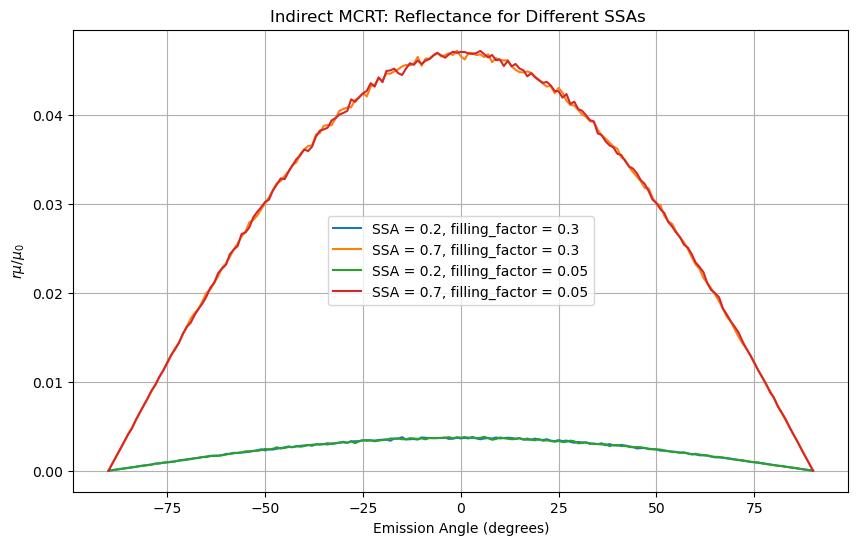

In [12]:
#CHECK FOR SSA AND FF
#MODIFY PARAMETERS ACCORDINGLY


# Simulation parameters
n_photons = 2*(10**4)  # Number of photons
radius = 1  # Arbitrary unit
ssas = [0.2, 0.7]  # Different SSAs
incidence_angle = 30  # Incidence angle in degrees
b = 0  # Asymmetry factor
filling_factors = [0.3,0.05]  # Fixed filling factor

# Run indirect MCRT simulation for different SSAs
plt.figure(figsize=(10, 6))
for filling_factor in filling_factors:
    for ssa in ssas:
        r_mu_over_mu_0 = indirect_mcrt(n_photons, radius, ssa, incidence_angle, b, filling_factor)
        # Plot results
        emission_angles = np.arange(-90, 91, 1)
        plt.plot(emission_angles, r_mu_over_mu_0, label=f'SSA = {ssa}, filling_factor = {filling_factor}')

plt.xlabel('Emission Angle (degrees)')
plt.ylabel(r'$r\mu / \mu_0$')
plt.title('Indirect MCRT: Reflectance for Different SSAs ')
plt.legend()
plt.grid(True)
plt.show()
